In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pymc3 as pm
import arviz as az

WARNING (theano.link.c.cmodule): install mkl with `conda install mkl-service`: No module named 'mkl'
WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [ ]:
model = pm.Model()
with model:
    alpha = 20
    clients_per_hour = pm.Poisson('clients_per_hour' ,alpha)
    waiting_time = pm.Normal('waiting_time', mu=1, sigma=1/2)
    avg_order = pm.Exponential('avg_order_time', 1/alpha)
    trace = pm.sample(20000)


array([<AxesSubplot:title={'center':'Clients per hour'}>,
       <AxesSubplot:title={'center':'Waiting Time'}>,
       <AxesSubplot:title={'center':'Avg order time'}>], dtype=object)

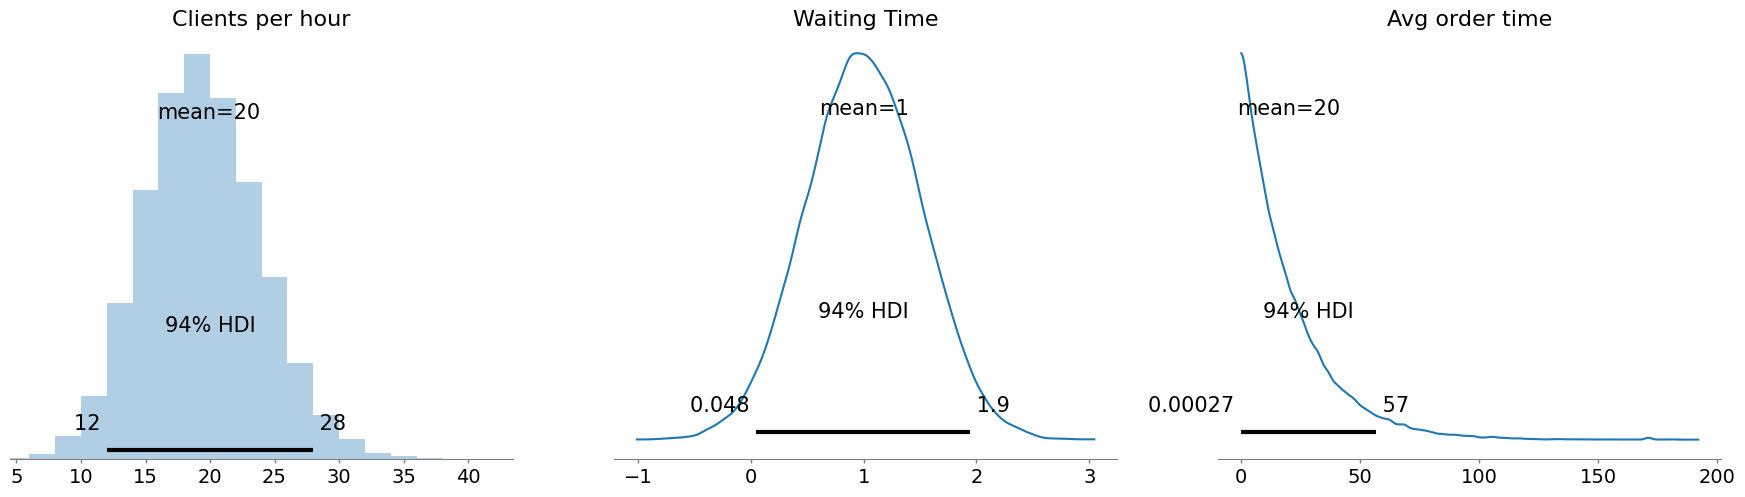

In [10]:

az.plot_posterior({"Clients per hour": trace['clients_per_hour'], "Waiting Time" : trace['waiting_time'], "Avg order time" : trace['avg_order_time']})
    